<a href="https://colab.research.google.com/github/andrebelem/pythonverse/blob/main/Exemplo_de_correla%C3%A7%C3%A3o_entre_dois_vetores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de correlação entre dois vetores


Autor: [A. Belem](mailto:andrebelem@id.uff.br) @ UFF 2024<br>

Neste exercício, estamos explorando a correlação entre duas variáveis complexas que representam vetores. As variáveis `onda_cpx` e `vento_cpx` são arrays complexos que descrevem vetores de onda e vento, respectivamente. Vamos calcular a correlação entre esses vetores para entender melhor a relação entre eles. Como estamos lidando com variáveis complexas, consideraremos tanto a parte real quanto a parte imaginária da correlação resultante para obter insights sobre a relação entre os vetores.

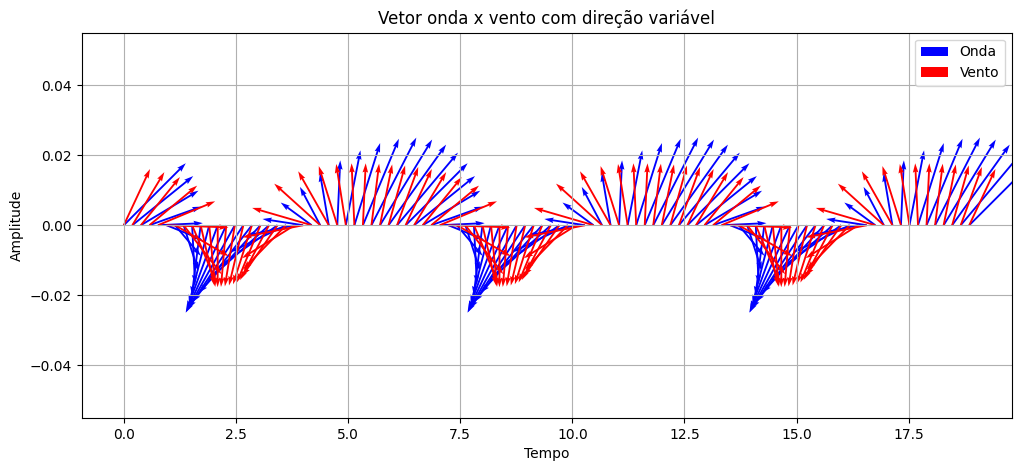

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Criando os vetores de onda artificialmente
tempo = np.linspace(0, 6*np.pi, 100)
onda_u = np.cos(tempo)  # 3 períodos completos dentro de 100 posições
onda_v = np.cos(tempo) - np.sin(tempo)

# Calculando o ângulo de rotação para cada ponto para criar um vetor de vento artificial
ang = np.arctan2(onda_v, onda_u) + np.deg2rad(20)  # Adicionando 20° ao ângulo de rotação

# Calculando as novas componentes vento_u e vento_v
vento_u = np.cos(ang)
vento_v = np.sin(ang)

# Plotando o vetor com origem em tempo e y=0, com rotação a cada ciclo
plt.figure(figsize=(12,5))
plt.quiver(tempo, np.zeros_like(tempo), onda_u, onda_v, color='b', scale=15, width=0.002, label='Onda')
plt.quiver(tempo, np.zeros_like(tempo), vento_u, vento_v, color='r', scale=15, width=0.002, label='Vento')

plt.title('Vetor onda x vento com direção variável')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()  # Adicionando a legenda
plt.show()

Agora, vamos criar dois vetores complexos que representam as componentes U e V de onda e vento:

In [36]:
# Criando arrays complexos baseados nos componentes u e v
onda_cpx = np.vectorize(complex)(onda_u, onda_v)
vento_cpx = np.vectorize(complex)(vento_u, vento_v)


Para interpretar o valor de correlação de forma real e não complexa, você pode considerar apenas a parte real da matriz de correlação. Como a correlação é uma medida da relação linear entre dois conjuntos de dados, a parte real da matriz de correlação representa a correlação linear entre as partes reais dos números complexos. A parte imaginária da correlação não tem uma interpretação direta no contexto da correlação de Pearson, que é a medida comummente usada para calcular a correlação entre dois conjuntos de dados. A correlação de Pearson é uma medida de correlação linear, e sua parte imaginária é irrelevante nesse contexto. A presença de uma parte imaginária na correlação pode surgir devido a artefatos numéricos ou imprecisões nos cálculos, especialmente ao lidar com números complexos. Na prática, a parte imaginária da correlação é geralmente negligenciada ou considerada como um artefato do cálculo e não tem significado estatístico ou interpretativo.


In [37]:
import numpy as np


# Calculando a correlação entre onda_cpx e vento_cpx
correlacao = np.corrcoef(onda_cpx, vento_cpx)

# Exibindo a parte real da matriz de correlação
print("Valor de correlação real entre onda_cpx e vento_cpx:")
print(correlacao.real)



Valor de correlação real entre onda_cpx e vento_cpx:
[[1.         0.90160737]
 [0.90160737 1.        ]]


veja que se ambos os vetores fossem iguais, a correlação é 1.

In [38]:

# Criando arrays complexos baseados nos componentes u e v
onda_cpx = np.vectorize(complex)(onda_u, onda_v)
vento_cpx = onda_cpx

# Calculando a correlação entre onda_cpx e vento_cpx
correlacao = np.corrcoef(onda_cpx, vento_cpx)

# Exibindo a parte real da matriz de correlação
print("Valor de correlação real entre onda_cpx e vento_cpx:")
print(correlacao.real)

Valor de correlação real entre onda_cpx e vento_cpx:
[[1. 1.]
 [1. 1.]]


# Vetor Complexo Representando Altura Hs e Direção das Ondas

Neste exemplo, estamos criando um vetor complexo que representa a altura das ondas (Hs) e a direção das ondas. Para fazer isso, seguimos os seguintes passos:

1. Pegue a altura das ondas (`Hs`) em metros e a direção das ondas em graus.
2. Converta a direção das ondas de graus para radianos.
3. Use a fórmula de Euler $e^{i\theta} = \cos(\theta) + i\sin(\theta)$ para representar a direção das ondas como um número complexo.
4. Multiplique a altura das ondas pela representação complexa da direção das ondas para obter o vetor complexo que representa a altura das ondas e a direção das ondas.

O código Python correspondente é fornecido abaixo:

In [39]:
import numpy as np

# Exemplo de altura das ondas (Hs) e direção das ondas (em graus)
Hs = 2.5  # metros
direcao_ondas = 45  # graus

# Convertendo a direção das ondas de graus para radianos e usando a fórmula de Euler
direcao_radianos = np.deg2rad(direcao_ondas)
direcao_cpx = np.cos(direcao_radianos) + 1j * np.sin(direcao_radianos)

# o vetor então é :
onda_cpx = Hs * direcao_cpx

Note então que se você está trabalhando sobre um conjunto de dados de boia, você pode facilmente converter as colunas direção e Hs em um vetor.

# Mais uma medida estatística

Embora o Root Mean Squared Error (RMSE) não seja uma medida muito usada para comparar vetores, e considerando que estamos tratando de grandezas físicas diferentes, aqui seria útil termos uma medida de desvio fazendo uso de um RMSE normalizado, ou seja, podemos normalizar ambos os vetores o que permite (em teoria) expressar o erro em uma escala relativa ao intervalo dos dados, facilitando a comparação entre os dois vetores, mas USE COM CAUTELA (veja abaixo)....

In [42]:
import numpy as np

def calcular_rmse(vec1, vec2):

    # calcula o módulo de cada vetor
    mod1 = np.abs(vec1)
    mod2 = np.abs(vec2)

    # Agora calculamos a diferença elemento a elemento entre os vetores normalizados e o quadrado das diferenças
    quad_diff = np.abs(vec1/mod1 - vec2/mod2) ** 2

    # Tirar a raiz quadrada da média dos quadrados das diferenças
    rmse_vecs = np.sqrt(np.mean(quad_diff))

    return rmse_vecs

In [44]:
rmse = calcular_rmse(vento_cpx, onda_cpx)
print("RMSE entre vento_cpx e onda_cpx:", rmse)

# veja como seria se ambos os vetores fossem iguais
rmse = calcular_rmse(vento_cpx, vento_cpx)
print("RMSE entre vetores iguais:", rmse)

RMSE entre vento_cpx e onda_cpx: 1.4071245690428238
RMSE entre vetores iguais: 0.0


## Cautela

Uma onda na superfície do oceano é uma perturbação ou variação periódica da superfície da água, que se propaga horizontalmente. Essas ondas são geradas por uma combinação de fatores, incluindo vento, gravidade, efeitos de marés e a interação da superfície da água com a atmosfera. As ondas oceânicas podem variar em tamanho, forma e comportamento, dependendo de vários fatores, como a força e direção do vento, a profundidade da água e a topografia do fundo do oceano. Porém, é um processo físico distinto do vento, mesmo porque o "fluído aqui" tem características físicas bem diferentes.

Já o vento é o movimento horizontal do ar na atmosfera da Terra, causado principalmente pela diferença de temperatura (ou pressão) entre diferentes regiões da superfície terrestre.

Note que a "vetorizar" cada uma dessas componentes só facilita nossa interpretação. Então, correlacionar ou calcular os desvios entre dois vetores, são operações matemáticas que estão relativamente desconectadas da física destes processos. Ainda assim, é **matematicamente coerente** correlacionar vetores ao invés da sua decomposição em u e v, como comumente aparece na maioria dos artigos.

Um uso interessante para este exemplo, seria a correlação entre os vetores de vento na superfície com os de corrente, em profundidade. Portanto, lembre-se da física por trás dos processos para não incorrer em erros de interpretação.

Claro, aqui está uma mensagem de aviso que você pode usar:

---
⚠️ **Aviso:**

Este documento contém informações gerais sobre operações de correlação usando ondas na superfície do oceano e o vento também na superfície. Embora as técnicas e explicações fornecidas sejam precisas até onde o conhecimento atual permite, o autor não se responsabiliza por quaisquer erros de interpretação ou uso indevido das técnicas aqui apresentadas. Recomenda-se que você consulte fontes adicionais e bibliografia de referência para obter orientação específica sobre este assunto (e se você for um estudante, converse com seu orientador para ver se ele "aceita" esse tipo de estatística ! 😏).

---